In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.7.6


## A Matemática das Redes Neurais Artificiais

### Construindo a Rede Neural com Programação e Matemática

Teremos 2 Partes:

- Parte 1 - Vamos construir uma rede neural artificial somente com operações matemáticas
- Parte 2 - Vamos treinar a rede para Prever a Ocorrência de Câncer

### Importando os Pacotes

In [ ]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

In [2]:
# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [4]:
# Por enquanto precisaremos somente do NumPy
import numpy as np

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "DRGM" --iversions

Author: DRGM



### Parte 1 - Implementando Uma Rede Neural Artificial Somente com Fórmulas Matemáticas (Sem Frameworks)

### Parte 1A - Forward Propagation

https://arxiv.org/pdf/1905.07490.pdf

### Desenvolvendo a Função Para Inicialização de Pesos

In [4]:
# Função para inicialização randômica dos parâmetros do modelo
def inicializa_parametros(dims_camada_entrada):
    
    # Dicionário para os parâmetros
    parameters = {}
    
    # Comprimento das dimensões das camadas
    comp = len(dims_camada_entrada)
    
    # Loop pelo comprimento
    for i in range(1, comp):
        
        # Inicialização da matriz de pesos
        parameters["W" + str(i)] = np.random.randn(dims_camada_entrada[i], dims_camada_entrada[i - 1]) * 0.01
        
        # Inicialização do bias
        parameters["b" + str(i)] = np.zeros((dims_camada_entrada[i], 1))
        
    return parameters

### Desenvolvendo a Função Sigmóide

In [5]:
# Função sigmóide
def sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))
    return A, Z

In [6]:
# Função de ativação ReLu (Rectified Linear Unit)
def relu(Z):
    A = abs(Z * (Z > 0))
    return A, Z

### Desenvolvendo a Ativação Linear

In [7]:
# Operação de ativação
# A é a matriz com os dados de entrada
# W é a matriz de pesos
# b é o bias
def linear_activation(A, W, b):
    Z = np.dot(W, A) + b
    cache = (A, W, b)
    return Z, cache

### Construindo o Processo de Forward Propagation

In [8]:
# Movimento para frente (forward)
def forward(A_prev, W, b, activation):
    
    # Se a função de ativação for Sigmoid, entramos neste bloco
    if activation == "sigmoid":
        Z, linear_cache = linear_activation(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
        
    # Se não, se for ReLu, entramos neste bloco    
    elif activation == "relu":
        Z, linear_cache = linear_activation(A_prev, W, b)
        A, activation_cache = relu(Z)
        
    cache = (linear_cache, activation_cache)
    
    return A, cache

### Combinando Ativação e Propagação

In [9]:
# Propagação para frente
def forward_propagation(X, parameters):
    
    # Lista de valores anteriores (cache)
    caches = []
    
    # Dados de entrada
    A = X
    
    # Comprimento dos parâmetros
    L = len(parameters) // 2
   
    # Loop
    for i in range(1, L):
      
        # Guarda o valor prévio de A
        A_prev = A
        
        # Executa o forward
        A, cache = forward(A_prev, parameters["W" + str(i)], parameters["b" + str(i)], activation = "relu")
        
        # Grava o cache
        caches.append(cache)
    
    # Saída na última camada
    A_last, cache = forward(A, parameters["W" + str(L)], parameters["b" + str(L)], activation = "sigmoid")
    
    # Grava o cache
    caches.append(cache)
    
    return(A_last, caches)

### Desenvolvendo a Função de Custo

In [10]:
# Função de custo (ou função de erro)
def calcula_custo(A_last, Y):
    
    # Ajusta o shape de Y para obter seu comprimento (total de elementos)
    m = Y.shape[1]
    
    # Calcula o custo comparando valor real e previso
    custo = (-1 / m) * np.sum((Y * np.log(A_last)) + ((1 - Y) * np.log(1 - A_last)))
    
    # Ajusta o shape do custo
    custo = np.squeeze(custo)
    
    return(custo)

### Parte 1B - Backward Propagation

### Desenvolvendo o Backward Propagation - Função Sigmóide Backward

In [11]:
# Função sigmoid para o backpropagation 
# Fazemos o cálculo da derivada pois não queremos o valor completo da função, mas sim sua variação
def sigmoid_backward(da, Z):
    
    # Calculamos a derivada de Z
    dg = (1 / (1 + np.exp(-Z))) * (1 - (1 / (1 + np.exp(-Z))))
    
    # Encontramos a mudança na derivada de z
    dz = da * dg
    return dz

# Compare com a função sigmoid do forward propagation
# A = 1 / (1 + np.exp(-Z))

### Desenvolvendo o Backward Propagation - Função ReLu Backward

In [12]:
# Função relu para o backpropagation 
# Fazemos o cálculo da derivada pois não queremos o valor completo da função, mas sim sua variação
def relu_backward(da, Z):
    
    dg = 1 * ( Z >= 0)
    dz = da * dg
    return dz

# Compare com a função relu do forward propagation:
# A = abs(Z * (Z > 0))

### Desenvolvendo o Backward Propagation - Ativação Linear Backward

In [13]:
# Ativação linear para o backpropagation
def linear_backward_function(dz, cache):
    
    # Recebe os valores do cache (memória)
    A_prev, W, b = cache
    
    # Shape de m
    m = A_prev.shape[1]
    
    # Calcula a derivada de W (resultado da operação com dz)
    dW = (1 / m) * np.dot(dz, A_prev.T)
    
    # Calcula a derivada de b (resultado da operação com dz)
    db = (1 / m) * np.sum(dz, axis = 1, keepdims = True)
    
    # Calcula a derivada da operação
    dA_prev = np.dot(W.T, dz)
    
    return dA_prev, dW, db

### Desenvolvendo o Backward Propagation - Ativação Linear Backward

In [14]:
# Função que define o tipo de ativação (relu ou sigmoid)
def linear_activation_backward(dA, cache, activation):
    
    # Extrai o cache
    linear_cache, activation_cache = cache
    
    # Verifica se a ativação é relu
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward_function(dZ, linear_cache)
        
    # Verifica se a ativação é sigmoid
    if activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward_function(dZ, linear_cache)
        
    return dA_prev, dW, db

### Combinando Ativação e Retropropagação - Algoritmo Backpropagation

In [15]:
# Algoritmo Backpropagation (calcula os gradientes para atualização dos pesos)
# AL = Valor previsto no Forward
# Y = Valor real
def backward_propagation(AL, Y, caches):
    
    # Dicionário para os gradientes
    grads = {}
    
    # Comprimento dos dados (que estão no cache)
    L = len(caches)
    
    # Extrai o comprimento para o valor de m
    m = AL.shape[1]
    
    # Ajusta o shape de Y
    Y = Y.reshape(AL.shape)
    
    # Calcula a derivada da previsão final da rede (feita ao final do Forward Propagation)
    dAL = -((Y / AL) - ((1 - Y) / (1 - AL)))
    
    # Captura o valor corrente do cache
    current_cache = caches[L - 1]
    
    # Gera a lista de gradiente para os dados, os pesos e o bias
    # Fazemos isso uma vez, pois estamos na parte final da rede, iniciando o caminho de volta
    grads["dA" + str(L - 1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    
    # Loop para calcular a derivada durante as ativações lineares com a relu
    for l in reversed(range(L - 1)):
        
        # Cache atual
        current_cache = caches[l]
        
        # Calcula as derivadas
        dA_prev, dW, db = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
        
        # Alimenta os gradientes na lista, usando o índice respectivo
        grads["dA" + str(l)] = dA_prev
        grads["dW" + str(l + 1)] = dW
        grads["db" + str(l + 1)] = db
        
    return grads

### Gradientes e Atualização dos Pesos

In [16]:
# Função de atualização de pesos
def atualiza_pesos(parameters, grads, learning_rate):
    
    # Comprimento da estrutura de dados com os parâmetros (pesos e bias)
    L = len(parameters)//2
    
    # Loop para atualização dos pesos
    for l in range(L):
        
        # Atualização dos pesos
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - (learning_rate * grads["dW" + str(l + 1)])
        
        # Atualização do bias
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - (learning_rate * grads["db" + str(l + 1)])
    
    return parameters

### Implementando a Rede Completa

In [17]:
# Modelo completo da rede neural
def modeloNN(X, Y, dims_camada_entrada, learning_rate = 0.0075, num_iterations = 100):
    
    # Lista para receber o custo a cada época de treinamento
    custos = []
    
    # Inicializa os parâmetros
    parametros = inicializa_parametros(dims_camada_entrada)
    
    # Loop pelo número de iterações (épocas)
    for i in range(num_iterations):
        
        # Forward Propagation
        AL, caches = forward_propagation(X, parametros)
        
        # Calcula o custo
        custo = calcula_custo(AL, Y)
        
        # Backward Propagation
        # Nota: ao invés de AL e Y, poderíamos passar somente o valor do custo
        # Estamos passando o valor de AL e Y para fique claro didaticamente o que está sendo feito
        gradientes = backward_propagation(AL, Y, caches)
        
        # Atualiza os pesos
        parametros = atualiza_pesos(parametros, gradientes, learning_rate)
        
        # Print do valor intermediário do custo
        # A redução do custo indica o aprendizado do modelo
        if i % 10 == 0:
            print("Custo Após " + str(i) + " iterações é " + str(custo))
            custos.append(custo)
            
    return parametros, custos 

In [18]:
# Função para fazer as previsões
# Não precisamos do Backpropagation pois ao fazer previsões como o modelo treinado, 
# teremos os melhores valores de pesos (parametros)
def predict(X, parametros):
    AL, caches = forward_propagation(X, parametros)
    return AL

### Parte 2 - Vamos treinar a rede para Prever a Ocorrência de Câncer

### Mini-Projeto 4 - Usando a Rede Neural Para Prever a Ocorrência de Câncer

In [19]:
# Imports
import sklearn
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [20]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

matplotlib: 3.2.1
numpy     : 1.18.5
sklearn   : 0.23.1
pandas    : 1.0.4



### Carregando os Dados

https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset

In [21]:
# Carregamos o objeto completo
temp = load_breast_cancer()

In [23]:
# Tipo do objeto
type(temp)

sklearn.utils.Bunch

In [23]:
# Visualiza o objeto
temp

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [24]:
# Carregamos o dataset (somente atributos)
dados = pd.DataFrame(columns = load_breast_cancer()['feature_names'], data = load_breast_cancer()['data'])

In [25]:
# Shape
dados.shape

(569, 30)

In [26]:
# Visualiza os dados
dados.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [27]:
# Verifica se temos valores ausentes
dados.isnull().any()

mean radius                False
mean texture               False
mean perimeter             False
mean area                  False
mean smoothness            False
mean compactness           False
mean concavity             False
mean concave points        False
mean symmetry              False
mean fractal dimension     False
radius error               False
texture error              False
perimeter error            False
area error                 False
smoothness error           False
compactness error          False
concavity error            False
concave points error       False
symmetry error             False
fractal dimension error    False
worst radius               False
worst texture              False
worst perimeter            False
worst area                 False
worst smoothness           False
worst compactness          False
worst concavity            False
worst concave points       False
worst symmetry             False
worst fractal dimension    False
dtype: boo

In [28]:
# Separa a variável target
target = load_breast_cancer()['target']

In [29]:
type(target)

numpy.ndarray

In [30]:
# Visualiza a variável
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [31]:
# Total de registros por classe - Câncer Benigno
np.count_nonzero(target == 1)

357

In [32]:
# Total de registros por classe - Câncer Maligno
np.count_nonzero(target == 0)

212

In [33]:
# Vamos extrair os labels

# Dicionário para os labels
labels = {}

# Nomes das classes da variável target
target_names = load_breast_cancer()['target_names']

# Mapeamento
for i in range(len(target_names)):
    labels.update({i: target_names[i]})

In [34]:
# Visualiza os labels
labels

{0: 'malignant', 1: 'benign'}

In [35]:
# Agora preparamos as variáveis preditoras em X
X = np.array(dados)

In [36]:
# Visualiza os dados de entrada
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [37]:
# Dividimos os dados de entrada e saída em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, target, test_size = 0.15, shuffle = True)

In [38]:
# Shape dos dados de treino
print(X_treino.shape)
print(y_treino.shape)

(483, 30)
(483,)


In [39]:
# Shape dos dados de teste
print(X_teste.shape)
print(y_teste.shape)

(86, 30)
(86,)


In [40]:
# Ajusta o shape dos dados de entrada
X_treino = X_treino.T
X_teste = X_teste.T

# outra forma:
# X_tr = X_treino.reshape(30, 483)
# X_te = X_teste.reshape(30, 86)

In [41]:
print(X_treino.shape)
print(X_teste.shape)

(30, 483)
(30, 86)


In [42]:
# Precisamos ajustar também os dados de saída
y_treino = y_treino.reshape(1, len(y_treino))
y_teste = y_teste.reshape(1, len(y_teste))

In [43]:
print(y_treino.shape)
print(y_teste.shape)

(1, 483)
(1, 86)


In [44]:
# Variável com as dimensões de entrada para oo número de neurônios 
dims_camada_entrada = [X_treino.shape[0], 50, 20, 5, 1]

In [45]:
X_treino.shape[0] # numero de colunas dos atributos

30

In [46]:
dims_camada_entrada

[30, 50, 20, 5, 1]

In [47]:
# Treinamento do modelo
print('\nIniciando o Treinamento.\n')

parametros, custo = modeloNN(X = X_treino,
                             Y = y_treino,
                             dims_camada_entrada = dims_camada_entrada,
                             num_iterations = 3000,
                             learning_rate = 0.0075)

print('\nTreinamento Concluido.\n')


Iniciando o Treinamento.

Custo Após 0 iterações é 0.6931539135462282
Custo Após 10 iterações é 0.6918378332225028
Custo Após 20 iterações é 0.6905711436974739
Custo Após 30 iterações é 0.6893512424545089
Custo Após 40 iterações é 0.6881762540332422
Custo Após 50 iterações é 0.6870444713030194
Custo Após 60 iterações é 0.6859543690403285
Custo Após 70 iterações é 0.684904321897292
Custo Após 80 iterações é 0.6838928238229938
Custo Após 90 iterações é 0.6829184762836057
Custo Após 100 iterações é 0.6819799661946898
Custo Após 110 iterações é 0.6810759075109984
Custo Após 120 iterações é 0.6802050958905865
Custo Após 130 iterações é 0.679366300983522
Custo Após 140 iterações é 0.6785582787636132
Custo Após 150 iterações é 0.6777798746096538
Custo Após 160 iterações é 0.6770300049398061
Custo Após 170 iterações é 0.6763075799969388
Custo Após 180 iterações é 0.6756115879129542
Custo Após 190 iterações é 0.6749410384739283
Custo Após 200 iterações é 0.6742949862587481
Custo Após 210 itera

Custo Após 1930 iterações é 0.3101095825579565
Custo Após 1940 iterações é 0.30842219096048973
Custo Após 1950 iterações é 0.30473031279499996
Custo Após 1960 iterações é 0.3039615131418131
Custo Após 1970 iterações é 0.30563713088930544
Custo Após 1980 iterações é 0.3009657022680123
Custo Após 1990 iterações é 0.30185016717561547
Custo Após 2000 iterações é 0.3013485703914156
Custo Após 2010 iterações é 0.2991772605033267
Custo Após 2020 iterações é 0.2987167410746751
Custo Após 2030 iterações é 0.2976005088411175
Custo Após 2040 iterações é 0.2974357909930929
Custo Após 2050 iterações é 0.2952571560215915
Custo Após 2060 iterações é 0.2939758584429935
Custo Após 2070 iterações é 0.29540255056353254
Custo Após 2080 iterações é 0.2934110997578939
Custo Após 2090 iterações é 0.29311716602245147
Custo Após 2100 iterações é 0.29592179427678367
Custo Após 2110 iterações é 0.2945228022326656
Custo Após 2120 iterações é 0.2942057077426824
Custo Após 2130 iterações é 0.2967389403223906
Custo 

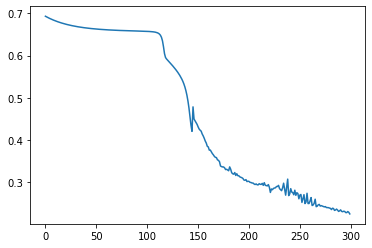

In [48]:
# Plot do erro durante o treinamento
plt.plot(custo)

In [49]:
# Previsões com os dados de treino
y_pred_treino = predict(X_treino, parametros)

In [50]:
# Visualiza as previsões
y_pred_treino

array([[9.54991860e-01, 9.57736371e-01, 9.64716418e-01, 9.17525880e-01,
        9.35540109e-01, 5.94042961e-01, 9.30931778e-01, 1.89838968e-05,
        9.09853130e-01, 9.52984257e-01, 1.02253903e-01, 1.43298554e-04,
        9.51575021e-01, 9.07413131e-01, 9.55686755e-01, 6.07538018e-04,
        9.47181512e-01, 1.74156593e-01, 9.61047222e-01, 3.55414958e-01,
        8.94742348e-01, 7.44622389e-02, 9.67946100e-01, 9.61085698e-01,
        7.81557461e-02, 9.40958412e-01, 9.16169761e-01, 9.34682584e-01,
        9.32719319e-01, 9.33933966e-01, 9.54835145e-01, 2.23188167e-03,
        9.45243246e-01, 9.54562151e-01, 9.21694894e-01, 9.58385371e-01,
        1.89597203e-03, 3.14705492e-01, 2.28159634e-01, 9.67788251e-01,
        9.61225952e-01, 9.65858328e-01, 8.24917654e-01, 6.33423152e-01,
        3.85438543e-04, 1.51949842e-07, 7.81444353e-01, 9.62066324e-01,
        5.88549248e-03, 9.41465047e-01, 9.56332746e-01, 8.84031221e-01,
        9.36812288e-01, 8.74682685e-01, 9.48602293e-01, 9.543200

In [51]:
# Ajustamos o shape em treino
y_pred_treino = y_pred_treino.reshape(-1)
y_treino = y_treino.reshape(-1)

In [53]:
y_pred_treino > 0.5

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False, False,  True,  True,  True, False,  True, False,
        True, False,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False, False, False,  True,  True,  True,  True,  True, False,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True, False, False,  True, False,  True,  True,  True,
        True, False,  True,  True, False,  True, False, False,  True,
       False,  True,  True, False, False, False, False,  True,  True,
       False,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,

In [52]:
# Convertemos as previsões para o valor binário de classe 
# (0 ou 1, usando como threshold o valor de 0.5 da probabilidade)
y_pred_treino = 1 * (y_pred_treino > 0.5)

In [54]:
y_pred_treino

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,

In [55]:
# Calculamos a acurácia comparando valor real com valor previsto
acc_treino = sum(1 * (y_pred_treino == y_treino)) / len(y_pred_treino) * 100

In [70]:
print('Acuracia nos dados de treinamento: ' + str(acc_treino) + ' %')

Acuracia nos dados de treinamento: 91.30434782608695 %


In [72]:
print(classification_report(y_treino, y_pred_treino, target_names = ['Maligno', 'Benigno']))

              precision    recall  f1-score   support

     Maligno       0.99      0.77      0.87       177
     Benigno       0.88      1.00      0.94       306

    accuracy                           0.91       483
   macro avg       0.94      0.88      0.90       483
weighted avg       0.92      0.91      0.91       483



In [73]:
# Previsões com o modelo usando dados de teste
y_pred_teste = predict(X_teste, parametros)

In [74]:
# Visualiza os dados
y_pred_teste

array([[9.31184700e-01, 9.01224991e-08, 9.59622477e-01, 2.88831907e-04,
        9.61024492e-01, 9.58309635e-01, 9.63581094e-01, 3.09509498e-01,
        9.59567110e-01, 9.61792235e-01, 5.32268382e-11, 9.47990149e-01,
        3.21923008e-01, 9.56923549e-01, 9.60714062e-01, 8.73693100e-01,
        9.31176840e-01, 9.50496110e-01, 9.55548707e-01, 9.69183560e-01,
        9.45461264e-01, 9.48123933e-01, 1.48543906e-03, 4.25314028e-11,
        9.57609629e-01, 9.47966760e-01, 9.56032129e-01, 9.29425287e-01,
        5.61652689e-05, 9.43210886e-01, 4.72363059e-01, 7.71420755e-24,
        9.37676340e-01, 2.78311026e-04, 8.52058064e-02, 9.67418632e-01,
        9.70930269e-01, 9.05683054e-01, 9.62511062e-01, 8.67452519e-01,
        4.88355406e-03, 6.93359939e-01, 4.02185561e-01, 9.52917192e-01,
        9.24934348e-01, 4.16204095e-01, 2.62719211e-01, 1.77547489e-01,
        9.59173072e-01, 9.63566515e-01, 9.46660252e-01, 3.32513174e-03,
        9.17325568e-01, 9.53230202e-01, 8.29082235e-13, 9.529845

In [75]:
# Ajustamos os shapes
y_pred_teste = y_pred_teste.reshape(-1)
y_teste = y_teste.reshape(-1)

In [76]:
# Convertemos as previsões para o valor binário de classe
y_pred_teste = 1 * (y_pred_teste > 0.5)

In [77]:
# Visualizamos as previsões
y_pred_teste

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0])

In [78]:
# Calculamos a acurácia
acuracia = sum(1 * (y_pred_teste == y_teste)) / len(y_pred_teste) * 100

In [79]:
print('Acuracia nos dados de teste: ' + str(acuracia) + ' %')

Acuracia nos dados de teste: 89.53488372093024 %


In [80]:
print(classification_report(y_teste, y_pred_teste, target_names = ['Maligno', 'Benigno']))

              precision    recall  f1-score   support

     Maligno       0.93      0.80      0.86        35
     Benigno       0.88      0.96      0.92        51

    accuracy                           0.90        86
   macro avg       0.90      0.88      0.89        86
weighted avg       0.90      0.90      0.89        86



### Treinamento do modelo com novos hiperparametros (num_iterations = 2000)

In [47]:
# Treinamento do modelo (num_iteration = 2000)
print('\nIniciando o Treinamento.\n')

parametros, custo = modeloNN(X = X_treino,
                             Y = y_treino,
                             dims_camada_entrada = dims_camada_entrada,
                             num_iterations = 2000,
                             learning_rate = 0.0075)

print('\nTreinamento Concluido.\n')


Iniciando o Treinamento.

Custo Após 0 iterações é 0.6931366686671557
Custo Após 10 iterações é 0.6917801993141504
Custo Após 20 iterações é 0.6904735899192277
Custo Após 30 iterações é 0.6892149858880487
Custo Após 40 iterações é 0.688002600326596
Custo Após 50 iterações é 0.6868347116276534
Custo Após 60 iterações é 0.6857096598070319
Custo Após 70 iterações é 0.6846258416937658
Custo Após 80 iterações é 0.683581711041495
Custo Após 90 iterações é 0.6825757775983526
Custo Após 100 iterações é 0.6816066043253695
Custo Após 110 iterações é 0.6806728054856601
Custo Após 120 iterações é 0.6797730426029729
Custo Após 130 iterações é 0.6789060243627253
Custo Após 140 iterações é 0.6780705048671651
Custo Após 150 iterações é 0.6772652808254799
Custo Após 160 iterações é 0.6764891882748754
Custo Após 170 iterações é 0.6757411048300516
Custo Após 180 iterações é 0.6750199432594193
Custo Após 190 iterações é 0.6743246516326918
Custo Após 200 iterações é 0.673654212340245
Custo Após 210 iteraç

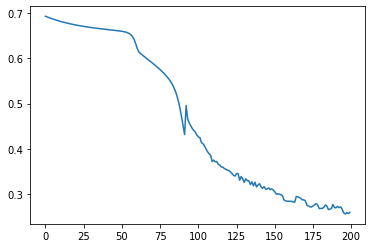

In [49]:
# Plot do erro durante o treinamento
plt.plot(custo)

### Treinamento do modelo com novos hiperparametros (num_iterations = 4000)

In [50]:
# Treinamento do modelo (num_iteration = 4000)
print('\nIniciando o Treinamento.\n')

parametros, custo = modeloNN(X = X_treino,
                             Y = y_treino,
                             dims_camada_entrada = dims_camada_entrada,
                             num_iterations = 4000,
                             learning_rate = 0.0075)

print('\nTreinamento Concluido.\n')


Iniciando o Treinamento.

Custo Após 0 iterações é 0.6931106055292341
Custo Após 10 iterações é 0.6917515080398237
Custo Após 20 iterações é 0.6904420770689581
Custo Após 30 iterações é 0.6891804386773674
Custo Após 40 iterações é 0.6879647826276277
Custo Após 50 iterações é 0.6867933613904031
Custo Após 60 iterações é 0.6856644779014447
Custo Após 70 iterações é 0.6845764923984213
Custo Após 80 iterações é 0.6835278190541935
Custo Após 90 iterações é 0.6825169075275428
Custo Após 100 iterações é 0.6815422336084296
Custo Após 110 iterações é 0.6806023452933052
Custo Após 120 iterações é 0.6796958296250611
Custo Após 130 iterações é 0.6788214207959719
Custo Após 140 iterações é 0.6779778529382012
Custo Após 150 iterações é 0.6771638198934661
Custo Após 160 iterações é 0.6763780593944854
Custo Após 170 iterações é 0.6756193479198263
Custo Após 180 iterações é 0.6748863801051371
Custo Após 190 iterações é 0.6741779142590515
Custo Após 200 iterações é 0.6734927171311531
Custo Após 210 ite

Custo Após 1790 iterações é 0.2673429945693985
Custo Após 1800 iterações é 0.26551598289566364
Custo Após 1810 iterações é 0.26613267211293584
Custo Após 1820 iterações é 0.2631658544182898
Custo Após 1830 iterações é 0.2622015162596815
Custo Após 1840 iterações é 0.26306433182687194
Custo Após 1850 iterações é 0.2626188997936554
Custo Após 1860 iterações é 0.26159780606074445
Custo Após 1870 iterações é 0.26171222977292097
Custo Após 1880 iterações é 0.2626115700777035
Custo Após 1890 iterações é 0.26141896108467655
Custo Após 1900 iterações é 0.26029360393013945
Custo Após 1910 iterações é 0.2622527950096604
Custo Após 1920 iterações é 0.2629952989140905
Custo Após 1930 iterações é 0.2647592915951451
Custo Após 1940 iterações é 0.27165026177110946
Custo Após 1950 iterações é 0.269705255793353
Custo Após 1960 iterações é 0.2629418066870893
Custo Após 1970 iterações é 0.25209806557501396
Custo Após 1980 iterações é 0.2515786721356659
Custo Após 1990 iterações é 0.25697159283119886
Cust

Custo Após 3510 iterações é 0.2072805175438897
Custo Após 3520 iterações é 0.20697359409896438
Custo Após 3530 iterações é 0.20736185313438937
Custo Após 3540 iterações é 0.2092876623476558
Custo Após 3550 iterações é 0.22959104617360004
Custo Após 3560 iterações é 0.21884113117247656
Custo Após 3570 iterações é 0.20768185193060806
Custo Após 3580 iterações é 0.20567835457535302
Custo Após 3590 iterações é 0.20587291091219845
Custo Após 3600 iterações é 0.2051196060959384
Custo Após 3610 iterações é 0.20591635545992693
Custo Após 3620 iterações é 0.20519497410445217
Custo Após 3630 iterações é 0.20524822685340244
Custo Após 3640 iterações é 0.2056241035532386
Custo Após 3650 iterações é 0.2132884068679691
Custo Após 3660 iterações é 0.21808589168448034
Custo Após 3670 iterações é 0.21560960014801098
Custo Após 3680 iterações é 0.21540158939373055
Custo Após 3690 iterações é 0.21491616962615048
Custo Após 3700 iterações é 0.21153390830990715
Custo Após 3710 iterações é 0.206927677391231

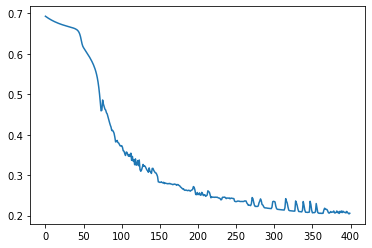

In [51]:
# Plot do erro durante o treinamento
plt.plot(custo)

### Treinamento do modelo com novos hiperparametros (num_iterations = 4000 e learning_rate = 0.0050)

In [52]:
# Treinamento do modelo (num_iteration = 4000 e learning_rate = 0.0050)
print('\nIniciando o Treinamento.\n')

parametros, custo = modeloNN(X = X_treino,
                             Y = y_treino,
                             dims_camada_entrada = dims_camada_entrada,
                             num_iterations = 4000,
                             learning_rate = 0.0050)

print('\nTreinamento Concluido.\n')


Iniciando o Treinamento.

Custo Após 0 iterações é 0.6931573765437663
Custo Após 10 iterações é 0.6922452255761569
Custo Após 20 iterações é 0.6913559841635172
Custo Após 30 iterações é 0.6904896915722831
Custo Após 40 iterações é 0.6896454094471275
Custo Após 50 iterações é 0.6888221220851606
Custo Após 60 iterações é 0.6880191856161394
Custo Após 70 iterações é 0.687236065818669
Custo Após 80 iterações é 0.686472248839546
Custo Após 90 iterações é 0.6857272213709511
Custo Após 100 iterações é 0.6850005123528247
Custo Após 110 iterações é 0.6842916744992146
Custo Após 120 iterações é 0.683600264284385
Custo Após 130 iterações é 0.6829258734410121
Custo Após 140 iterações é 0.6822681129583197
Custo Após 150 iterações é 0.6816265461784231
Custo Após 160 iterações é 0.6810007442154096
Custo Após 170 iterações é 0.6803903019494039
Custo Após 180 iterações é 0.679794829672052
Custo Após 190 iterações é 0.6792139548516726
Custo Após 200 iterações é 0.6786473042693764
Custo Após 210 iteraçõ

Custo Após 1860 iterações é 0.3275221157435947
Custo Após 1870 iterações é 0.32643362272873916
Custo Após 1880 iterações é 0.3245045664626647
Custo Após 1890 iterações é 0.3235441949770998
Custo Após 1900 iterações é 0.32162287620548513
Custo Após 1910 iterações é 0.32051349831647424
Custo Após 1920 iterações é 0.36288026025996245
Custo Após 1930 iterações é 0.36723808071706876
Custo Após 1940 iterações é 0.35753344864450165
Custo Após 1950 iterações é 0.3626448484079818
Custo Após 1960 iterações é 0.33378662063221387
Custo Após 1970 iterações é 0.3359176005484197
Custo Após 1980 iterações é 0.3329026660742226
Custo Após 1990 iterações é 0.3297456834580395
Custo Após 2000 iterações é 0.33276312877383957
Custo Após 2010 iterações é 0.3359030612351047
Custo Após 2020 iterações é 0.3279268162976191
Custo Após 2030 iterações é 0.3275752386612244
Custo Após 2040 iterações é 0.32825714105251524
Custo Após 2050 iterações é 0.32772197963455096
Custo Após 2060 iterações é 0.3228336759471389
Cus

Custo Após 3640 iterações é 0.24222941231869088
Custo Após 3650 iterações é 0.24525352205939185
Custo Após 3660 iterações é 0.24556992134703684
Custo Após 3670 iterações é 0.24647636040836565
Custo Após 3680 iterações é 0.2365544954956044
Custo Após 3690 iterações é 0.2330350502638364
Custo Após 3700 iterações é 0.24070087575497603
Custo Após 3710 iterações é 0.25092272061269644
Custo Após 3720 iterações é 0.23715701917521864
Custo Após 3730 iterações é 0.22596799134252205
Custo Após 3740 iterações é 0.23181106303661622
Custo Após 3750 iterações é 0.24834282298947194
Custo Após 3760 iterações é 0.24294025235670855
Custo Após 3770 iterações é 0.22680899976648136
Custo Após 3780 iterações é 0.22364821553469325
Custo Após 3790 iterações é 0.2363661362055847
Custo Após 3800 iterações é 0.24696827191472906
Custo Após 3810 iterações é 0.2341374152942245
Custo Após 3820 iterações é 0.22159580901643014
Custo Após 3830 iterações é 0.22197590566248182
Custo Após 3840 iterações é 0.23760861941070

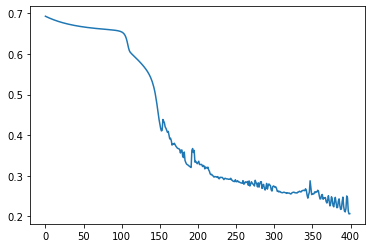

In [53]:
# Plot do erro durante o treinamento
plt.plot(custo)

### Treinamento do modelo com novos hiperparametros (num_iterations = 4000 e learning_rate = 0.0100)

In [54]:
# Treinamento do modelo (num_iteration = 4000 e learning_rate = 0.0100)
print('\nIniciando o Treinamento.\n')

parametros, custo = modeloNN(X = X_treino,
                             Y = y_treino,
                             dims_camada_entrada = dims_camada_entrada,
                             num_iterations = 4000,
                             learning_rate = 0.0100)

print('\nTreinamento Concluido.\n')


Iniciando o Treinamento.

Custo Após 0 iterações é 0.6931575491087197
Custo Após 10 iterações é 0.6913613832237078
Custo Após 20 iterações é 0.6896528716542442
Custo Após 30 iterações é 0.688027728424258
Custo Após 40 iterações é 0.6864818676773352
Custo Após 50 iterações é 0.6850113967609379
Custo Após 60 iterações é 0.6836126152201653
Custo Após 70 iterações é 0.6822819997429359
Custo Após 80 iterações é 0.6810161933105873
Custo Após 90 iterações é 0.6798120065357987
Custo Após 100 iterações é 0.6786664044411281
Custo Após 110 iterações é 0.6775765011422269
Custo Após 120 iterações é 0.6765395487521959
Custo Após 130 iterações é 0.675552943778343
Custo Após 140 iterações é 0.6746142031091541
Custo Após 150 iterações é 0.6737209745287719
Custo Após 160 iterações é 0.6728710161367991
Custo Após 170 iterações é 0.6720621939869598
Custo Após 180 iterações é 0.6712924805133825
Custo Após 190 iterações é 0.6705599492174826
Custo Após 200 iterações é 0.6698627744407865
Custo Após 210 itera

Custo Após 1870 iterações é 0.2653684659487318
Custo Após 1880 iterações é 0.2653108465955739
Custo Após 1890 iterações é 0.26338329820500106
Custo Após 1900 iterações é 0.2595709626924757
Custo Após 1910 iterações é 0.2558353103022902
Custo Após 1920 iterações é 0.2555726544680688
Custo Após 1930 iterações é 0.2546121191043471
Custo Após 1940 iterações é 0.2533706723235721
Custo Após 1950 iterações é 0.25116166795774136
Custo Após 1960 iterações é 0.2524025978147463
Custo Após 1970 iterações é 0.25545395163680323
Custo Após 1980 iterações é 0.25463640441741836
Custo Após 1990 iterações é 0.2528663869589043
Custo Após 2000 iterações é 0.25154651084871904
Custo Após 2010 iterações é 0.25184454357209046
Custo Após 2020 iterações é 0.2514133983160863
Custo Após 2030 iterações é 0.25197372011144736
Custo Após 2040 iterações é 0.25068102165843653
Custo Após 2050 iterações é 0.2512580590585649
Custo Após 2060 iterações é 0.24912622759337347
Custo Após 2070 iterações é 0.2467588237980263
Cust

Custo Após 3610 iterações é 0.2020201467020285
Custo Após 3620 iterações é 0.20517233026772724
Custo Após 3630 iterações é 0.20833289049684758
Custo Após 3640 iterações é 0.2030121879673675
Custo Após 3650 iterações é 0.20092312639125845
Custo Após 3660 iterações é 0.20183160623671648
Custo Após 3670 iterações é 0.20377609108454572
Custo Após 3680 iterações é 0.20360612700644526
Custo Após 3690 iterações é 0.2021459209648307
Custo Após 3700 iterações é 0.20004600742779358
Custo Após 3710 iterações é 0.20039199049386566
Custo Após 3720 iterações é 0.20362668143403914
Custo Após 3730 iterações é 0.2022041237234659
Custo Após 3740 iterações é 0.20240411003447958
Custo Após 3750 iterações é 0.20290577786370634
Custo Após 3760 iterações é 0.20132184158546496
Custo Após 3770 iterações é 0.2009944399656945
Custo Após 3780 iterações é 0.20138565505961778
Custo Após 3790 iterações é 0.2008148845973856
Custo Após 3800 iterações é 0.20034604796904248
Custo Após 3810 iterações é 0.2006033377341522

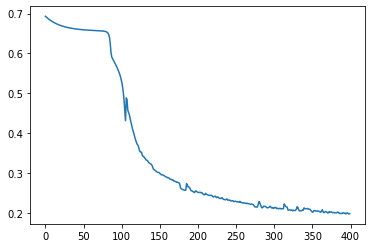

In [55]:
# Plot do erro durante o treinamento
plt.plot(custo)

In [56]:
# Previsoes com os dados de treino na melhor versao alcancada
# num_iterations = 4000
# learning_rate = 0.0100
y_pred_treino = predict(X_treino, parametros)

In [57]:
# Ajuste do shape em treino
y_pred_treino = y_pred_treino.reshape(-1)
y_treino = y_treino.reshape(-1)

In [58]:
# Convertemos as previsões para o valor binário de classe 
# (0 ou 1, usando como threshold o valor de 0.5 da probabilidade)
y_pred_treino = 1 * (y_pred_treino > 0.5)

In [59]:
# Calculamos a acuracia comparando valor real com valor previsto
acc_treino_novo1 = sum(1 * (y_pred_treino == y_treino)) / len(y_pred_treino) * 100

In [60]:
print('Acuracia nos dados de treino: ' + str(acc_treino_novo1) + ' %')

Acuracia nos dados de treino: 92.33954451345755 %


In [61]:
print(classification_report(y_treino, y_pred_treino, target_names = ['Maligno', 'Beingno']))

              precision    recall  f1-score   support

     Maligno       0.91      0.88      0.89       176
     Beingno       0.93      0.95      0.94       307

    accuracy                           0.92       483
   macro avg       0.92      0.91      0.92       483
weighted avg       0.92      0.92      0.92       483



In [62]:
# Previsoes com o modelo usando dados de teste
y_pred_teste = predict(X_teste, parametros)

In [63]:
# Visualiza os dados
y_pred_teste

array([[8.95096094e-01, 9.27908941e-01, 7.88709018e-01, 2.72557380e-06,
        8.24443205e-13, 7.45400041e-01, 9.27926855e-01, 3.32147188e-10,
        2.72365936e-01, 9.27900407e-01, 9.27927370e-01, 6.77325548e-01,
        9.08156681e-01, 9.13041890e-01, 1.23873550e-04, 5.66253928e-06,
        9.27914819e-01, 8.82062571e-01, 9.23406452e-01, 6.21537238e-04,
        3.97408485e-01, 1.61105514e-01, 1.47307411e-17, 2.80920784e-05,
        8.88728138e-01, 3.62175192e-02, 9.27930379e-01, 1.83750828e-04,
        1.60527585e-06, 6.84967545e-01, 8.87137093e-01, 8.37567906e-01,
        7.33248599e-05, 1.57570986e-10, 1.42111931e-02, 9.27898619e-01,
        1.92286820e-01, 8.10265801e-01, 1.15046854e-05, 9.27948558e-01,
        2.43864758e-06, 9.17835853e-01, 9.27934192e-01, 4.18291257e-19,
        8.85260411e-01, 4.34660973e-02, 9.15171042e-01, 6.43881054e-01,
        1.30746631e-03, 5.60363463e-03, 9.27903292e-01, 8.50579472e-01,
        9.23119761e-01, 2.29726680e-03, 8.39973254e-01, 1.912113

In [64]:
# Ajuste do shape
y_pred_teste = y_pred_teste.reshape(-1)
y_teste = y_teste.reshape(-1)

In [65]:
# Convertendo os valores da classe de teste para binario
y_pred_teste = 1 * (y_pred_teste > 0.5)

In [66]:
y_pred_teste

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1])

In [67]:
# Calculo da acuracia
acuracia_new1 = sum(1 * (y_pred_teste == y_teste)) / len(y_pred_teste) * 100

In [68]:
print('Acuracia nos dados de teste: ' + str(acuracia_new1) + ' %')

Acuracia nos dados de teste: 94.18604651162791 %


In [69]:
print(classification_report(y_teste, y_pred_teste, target_names = ['Maligno', 'Benigno']))

              precision    recall  f1-score   support

     Maligno       0.97      0.89      0.93        36
     Benigno       0.92      0.98      0.95        50

    accuracy                           0.94        86
   macro avg       0.95      0.93      0.94        86
weighted avg       0.94      0.94      0.94        86



Acuracia nos dados de treino: 92.3%

Acuracia nos dados de teste: 94.2%

Ha um forte indicativo que nosso modelo "overfitou"